# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission

Student's Name:
- Name 1
- Name 2
- ...

### Problem Statement

Describe the problem statement

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import numpy as np
from IPython.display import display
from datetime import datetime

In [14]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [15]:
df: pd.DataFrame = pd.read_csv('climate-ds.csv')

# Display the DataFrame
display(df)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.00,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


In [16]:
#Number countries we analysing
print(f"Number  has {df.Area.nunique()} unique value\nThere names :\n{df.Area.unique().tolist()}")

Number  has 101 unique value
There names :
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia'

In [17]:
#Number countries we analysing
print(f"Number  has {df.Item.nunique()} unique value\nThere names :\n{df.Item.unique().tolist()}")

Number  has 10 unique value
There names :
['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']


### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [18]:
# consider a list of countries we care ab
countries = ['Armenia', 'Azerbaijan','Bahrain', 'Bangladesh',  'Egypt', 'India', 'Indonesia', 'Iraq',  'Japan', 'Kazakhstan',  'Lebanon',  'Malaysia', 'Nepal', 'Pakistan', 'Qatar', 'Saudi Arabia',  'Sri Lanka','Thailand','Tajikistan',  'Turkey']

# check the pandas Area column contain the given list of strings
countriesdf = (df[df['Area'].isin(countries)])

display(countriesdf)


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,745,Armenia,Maize,1992,562,8.0,7.44,32344
746,746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,748,Armenia,Maize,1993,562,8.0,7.69,32261
749,749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...,...
27145,27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


In [19]:
# consider a list of crops
crops = ["Potatoes","Maize","Rice, paddy","Wheat","Soybeans",'Sweet potatoes','Yams','Sorghum']

# check the pandas Area column contain the given list of strings
cropdfs = (countriesdf[countriesdf['Item'].isin(crops)])

display(cropdfs)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,745,Armenia,Maize,1992,562,8.0,7.44,32344
746,746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,748,Armenia,Maize,1993,562,8.0,7.69,32261
749,749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...,...
27145,27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


In [20]:
dffin = cropdfs.drop(cropdfs.columns[0], axis=1)
dfinit = dffin

display(dffin)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,Armenia,Maize,1992,562,8.0,7.44,32344
746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,Armenia,Maize,1993,562,8.0,7.69,32261
749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


In [21]:
dffin.isnull().sum() #some data validation

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [22]:
#check Duplicates
dffin.duplicated().sum()



1403

In [23]:
#remove Duplicates
dffin.drop_duplicates(keep='first',inplace = True)
dffin.duplicated().sum()

0

In [24]:
display(dffin)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,Armenia,Maize,1992,562,8.0,7.44,32344
746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,Armenia,Maize,1993,562,8.0,7.69,32261
749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


# Descriptive statistics

In [25]:
df = dffin

display(df)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,Armenia,Maize,1992,562,8.0,7.44,32344
746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,Armenia,Maize,1993,562,8.0,7.69,32261
749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


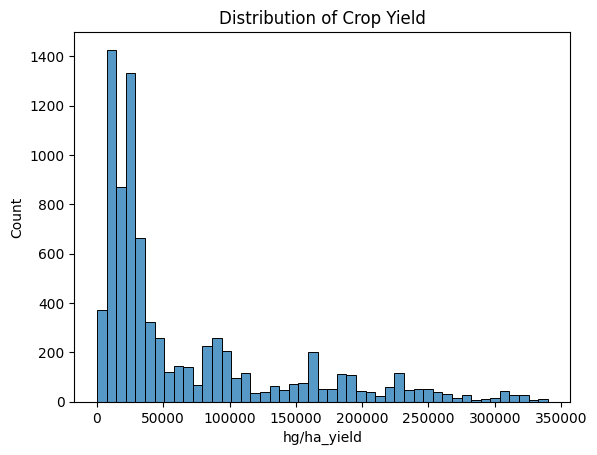

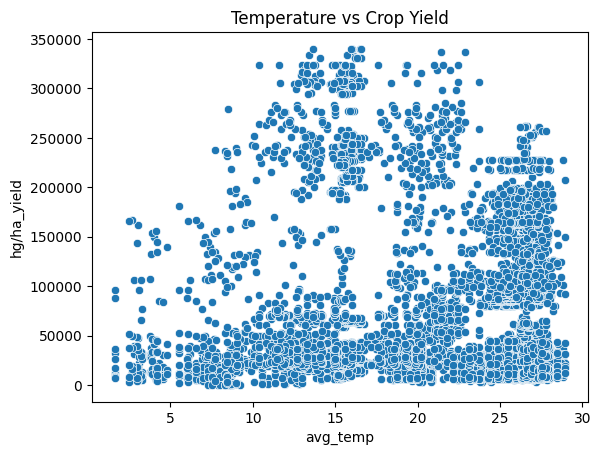

C:\Users\Alaina\AppData\Local\Temp\ipykernel_22840\439660780.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


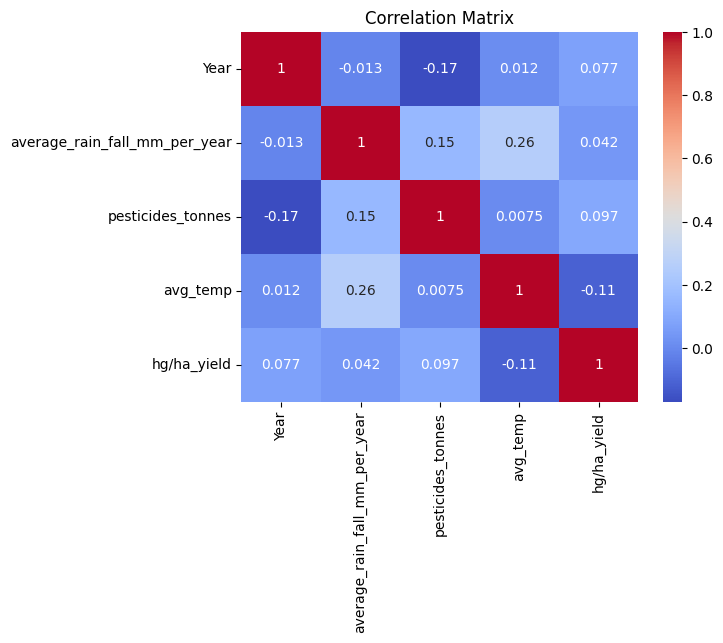

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of crop yield
sns.histplot(df['hg/ha_yield'])
plt.title('Distribution of Crop Yield')
plt.show()

# Scatter plot between temperature and crop yield
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df)
plt.title('Temperature vs Crop Yield')
plt.show()

# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


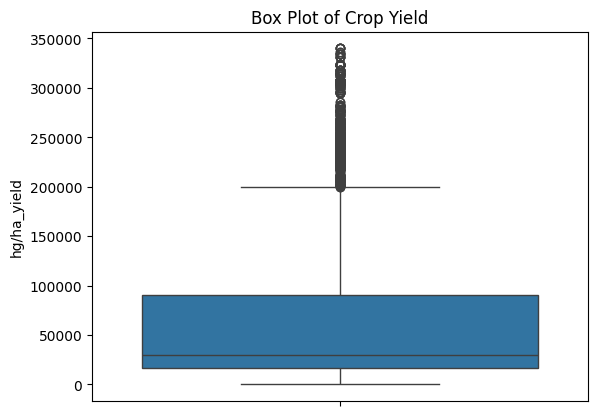

In [27]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['hg/ha_yield'])
plt.title('Box Plot of Crop Yield')
plt.show()


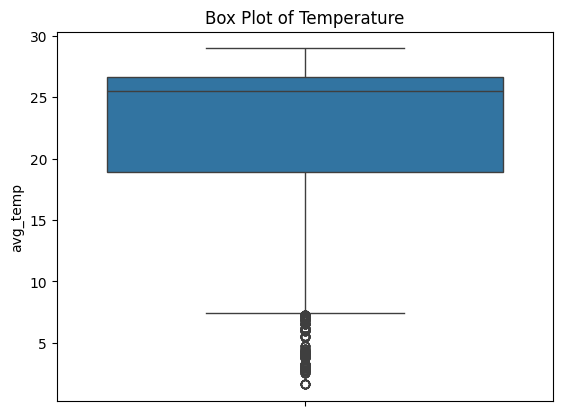

In [29]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['avg_temp'])
plt.title('Box Plot of Temperature')
plt.show()


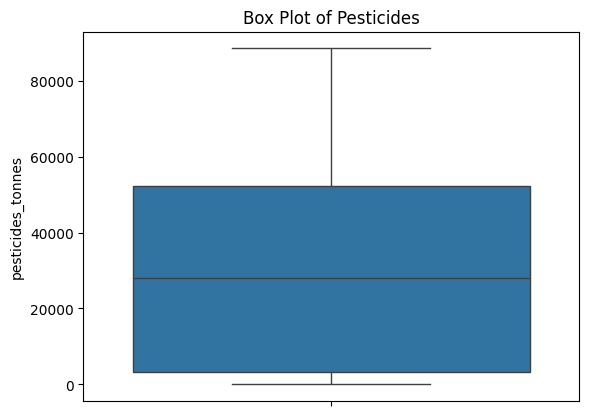

In [30]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['pesticides_tonnes'])
plt.title('Box Plot of Pesticides')
plt.show()


In [31]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

# Detect outliers for crop yield
outliers = detect_outliers_iqr(df['hg/ha_yield'])
print("Outliers detected:\n", df.iloc[outliers])

# Remove outliers from the dataset
data_clean = df.drop(df.index[outliers])
display(data_clean)


Outliers detected:
           Area      Item  Year  average_rain_fall_mm_per_year  \
803    Armenia  Potatoes  2012                            562   
806    Armenia  Potatoes  2013                            562   
2055   Bahrain  Potatoes  1991                             83   
2075   Bahrain  Potatoes  2007                             83   
2076   Bahrain  Potatoes  2008                             83   
...        ...       ...   ...                            ...   
27125   Turkey  Potatoes  2013                            593   
27126   Turkey  Potatoes  2013                            593   
27127   Turkey  Potatoes  2013                            593   
27128   Turkey  Potatoes  2013                            593   
27129   Turkey  Potatoes  2013                            593   

       pesticides_tonnes  avg_temp  hg/ha_yield  
803               278.72     10.20       207151  
806               278.72     11.08       215290  
2055               14.05     25.73       206667  

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,Armenia,Maize,1992,562,8.0,7.44,32344
746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,Armenia,Maize,1993,562,8.0,7.69,32261
749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


In [ ]:
df = data_clean
display(df)

In [33]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

# Detect outliers for crop yield
outliers2 = detect_outliers_iqr(df['avg_temp'])
print("Outliers detected:\n", df.iloc[outliers2])

# Remove outliers from the dataset
data_clean2 = df.drop(df.index[outliers2])
display(data_clean2)


Outliers detected:
              Area         Item  Year  average_rain_fall_mm_per_year  \
745       Armenia        Maize  1992                            562   
746       Armenia     Potatoes  1992                            562   
747       Armenia        Wheat  1992                            562   
748       Armenia        Maize  1993                            562   
749       Armenia     Potatoes  1993                            562   
...           ...          ...   ...                            ...   
26288  Tajikistan        Wheat  2012                            691   
26576      Turkey        Maize  1992                            593   
26586      Turkey  Rice, paddy  1992                            593   
26591      Turkey     Soybeans  1992                            593   
26596      Turkey        Wheat  1992                            593   

       pesticides_tonnes  avg_temp  hg/ha_yield  
745                  8.0      7.44        32344  
746                  8.0   

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
763,Armenia,Maize,1998,562,50.92,10.28,26082
764,Armenia,Potatoes,1998,562,50.92,10.28,134409
765,Armenia,Wheat,1998,562,50.92,10.28,20651
766,Armenia,Maize,1999,562,60.38,10.11,40303
767,Armenia,Potatoes,1999,562,60.38,10.11,130618
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.00,20.22,28451
27146,Turkey,Wheat,2013,593,39440.00,13.27,28451
27147,Turkey,Wheat,2013,593,39440.00,14.07,28451
27148,Turkey,Wheat,2013,593,39440.00,16.02,28451


In [34]:
df = data_clean2

display(df)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
763,Armenia,Maize,1998,562,50.92,10.28,26082
764,Armenia,Potatoes,1998,562,50.92,10.28,134409
765,Armenia,Wheat,1998,562,50.92,10.28,20651
766,Armenia,Maize,1999,562,60.38,10.11,40303
767,Armenia,Potatoes,1999,562,60.38,10.11,130618
...,...,...,...,...,...,...,...
27145,Turkey,Wheat,2013,593,39440.00,20.22,28451
27146,Turkey,Wheat,2013,593,39440.00,13.27,28451
27147,Turkey,Wheat,2013,593,39440.00,14.07,28451
27148,Turkey,Wheat,2013,593,39440.00,16.02,28451


Outliers detected:
        Unnamed: 0            Area      Item  Year  \
88             88         Albania  Potatoes  2011   
92             92         Albania  Potatoes  2012   
96             96         Albania  Potatoes  2013   
184           184         Algeria  Potatoes  2008   
189           189         Algeria  Potatoes  2009   
...           ...             ...       ...   ...   
27703       27703  United Kingdom  Potatoes  2013   
27704       27704  United Kingdom  Potatoes  2013   
27705       27705  United Kingdom  Potatoes  2013   
27706       27706  United Kingdom  Potatoes  2013   
27707       27707  United Kingdom  Potatoes  2013   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  hg/ha_yield  
88                              1485            1302.63     16.45       242211  
92                              1485             766.25     16.70       250538  
96                              1485             982.32     17.41       260110  
184                

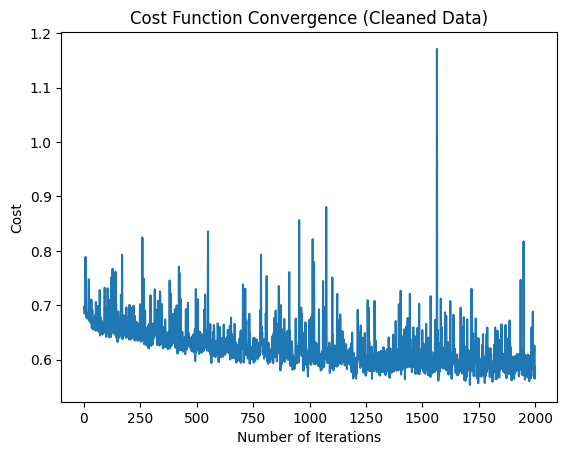

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

# Load and preprocess your data
data = pd.read_csv('climate-ds.csv')

# Normalize the target variable
y = data['hg/ha_yield'].values / np.max(data['hg/ha_yield'].values)

# Normalize features
X = data[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Detecting and removing outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

# Detect outliers for crop yield
outliers = detect_outliers_iqr(data['hg/ha_yield'])
print("Outliers detected:\n", data.iloc[outliers])

# Remove outliers from the dataset
data_clean = data.drop(data.index[outliers])
print("Data after removing outliers:\n", data_clean.head())

data = data_clean

# Detect outliers for average temperature
outliers = detect_outliers_iqr(data['avg_temp'])
print("Outliers detected:\n", data.iloc[outliers])

# Remove outliers from the dataset
data_clean = data.drop(data.index[outliers])
print("Data after removing outliers:\n", data_clean.head())

# Re-normalize the cleaned target variable
y_clean = data_clean['hg/ha_yield'].values / np.max(data_clean['hg/ha_yield'].values)

# Re-normalize cleaned features
X_clean = data_clean[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values
X_clean = (X_clean - np.mean(X_clean, axis=0)) / np.std(X_clean, axis=0)

# Add intercept term to X
X_clean = np.c_[np.ones(X_clean.shape[0]), X_clean]

# Polynomial features
def polynomial_features(X, degree):
    poly_X = np.ones((X.shape[0], 1))
    for d in range(1, degree + 3):
        for items in combinations_with_replacement(range(X.shape[1]), d):
            poly_X = np.column_stack((poly_X, np.prod(X[:, items], axis=1)))
    return poly_X

X_poly = polynomial_features(X_clean[:, 1:], degree=2)  # Polynomial features without intercept
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]  # Re-adding intercept

# Train-Test Split (manual split)
np.random.seed(42)
indices_clean = np.random.permutation(X_poly.shape[0])
split_ratio = 0.8
train_size_clean = int(split_ratio * X_poly.shape[0])
train_indices_clean = indices_clean[:train_size_clean]
test_indices_clean = indices_clean[train_size_clean:]

X_train_clean = X_poly[train_indices_clean]
y_train_clean = y_clean[train_indices_clean]
X_test_clean = X_poly[test_indices_clean]
y_test_clean = y_clean[test_indices_clean]

# Model functions
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow/underflow
    return 1 / (1 + np.exp(-z))

def clipped_sigmoid(z):
    return np.clip(sigmoid(z), 1e-15, 1 - 1e-15)

def predict(X, theta):
    return clipped_sigmoid(X @ theta)

def cost_function_reg(theta, X, y, lambda_):
    m = len(y)
    h = clipped_sigmoid(X @ theta)
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
    return cost

def mini_batch_gradient_descent(X, y, theta, alpha, num_iters, lambda_, batch_size):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        h = clipped_sigmoid(X_batch @ theta)
        gradient = 1/len(y_batch) * X_batch.T @ (h - y_batch)
        gradient[1:] += (lambda_/len(y_batch)) * theta[1:]
        theta = theta - alpha * gradient
        cost = cost_function_reg(theta, X_batch, y_batch, lambda_)
        cost_history.append(cost)

        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Cross-validation
def cross_validate(X, y, num_folds, alpha, num_iters, lambda_, batch_size):
    fold_size = len(y) // num_folds
    r2_scores = []

    for i in range(num_folds):
        X_train_cv = np.concatenate([X[:i*fold_size], X[(i+1)*fold_size:]], axis=0)
        y_train_cv = np.concatenate([y[:i*fold_size], y[(i+1)*fold_size:]], axis=0)
        X_val_cv = X[i*fold_size:(i+1)*fold_size]
        y_val_cv = y[i*fold_size:(i+1)*fold_size]

        theta = np.zeros(X_train_cv.shape[1])
        theta, _ = mini_batch_gradient_descent(X_train_cv, y_train_cv, theta, alpha, num_iters, lambda_, batch_size)
        predictions = predict(X_val_cv, theta)
        r2_scores.append(r_squared(y_val_cv, predictions))

    return np.mean(r2_scores)

# Example usage of cross-validation
num_folds = 5
alpha = 0.001  # Learning rate
num_iters = 2000  # Number of iterations
lambda_ = 1  # Regularization parameter
batch_size = 128  # Define batch size

average_r2 = cross_validate(X_train_clean, y_train_clean, num_folds, alpha, num_iters, lambda_, batch_size)
print("Average R-squared from Cross-Validation:", average_r2)

# Re-train model with regularization on the entire cleaned dataset using mini-batch gradient descent
theta_clean, cost_history_clean = mini_batch_gradient_descent(X_train_clean, y_train_clean, np.zeros(X_train_clean.shape[1]), alpha, num_iters, lambda_, batch_size)
predictions_clean = predict(X_test_clean, theta_clean)

# Evaluation metrics functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
mse_clean = mean_squared_error(y_test_clean, predictions_clean)
mae_clean = mean_absolute_error(y_test_clean, predictions_clean)
r2_clean = r_squared(y_test_clean, predictions_clean) 
rmse_clean = root_mean_squared_error(y_test_clean, predictions_clean) 
mape_clean = mean_absolute_percentage_error(y_test_clean,predictions_clean)

# Print metrics
print("Mean Squared Error (MSE) on Cleaned Data:", mse_clean)
print("Mean Absolute Error (MAE) on Cleaned Data:", mae_clean)
print("R-squared (R²) on Cleaned Data:", r2_clean)
print("Root Mean Squared Error (RMSE) on Cleaned Data:", rmse_clean)
print("Mean Absolute Percentage Error (MAPE) on Cleaned Data:", mape_clean)

# Plot cost function
plt.plot(range(num_iters), cost_history_clean)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Cleaned Data)')
plt.show()


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_clean, y_train_clean)

# Make predictions
predictions_clean = model.predict(X_test_clean)

# Calculate evaluation metrics
mse_clean = mean_squared_error(y_test_clean, predictions_clean)
mae_clean = mean_absolute_error(y_test_clean, predictions_clean)
r2_clean = r_squared(y_test_clean, predictions_clean)
rmse_clean = root_mean_squared_error(y_test_clean, predictions_clean)
mape_clean = mean_absolute_percentage_error(y_test_clean, predictions_clean)

# Print metrics
print("Mean Squared Error (MSE) on Cleaned Data:", mse_clean)
print("Mean Absolute Error (MAE) on Cleaned Data:", mae_clean)
print("R-squared (R²) on Cleaned Data:", r2_clean)
print("Root Mean Squared Error (RMSE) on Cleaned Data:", rmse_clean)
print("Mean Absolute Percentage Error (MAPE) on Cleaned Data:", mape_clean)


Mean Squared Error (MSE) on Cleaned Data: 0.07006302382294781
Mean Absolute Error (MAE) on Cleaned Data: 0.20974543942676915
R-squared (R²) on Cleaned Data: -0.2537937535427979
Root Mean Squared Error (RMSE) on Cleaned Data: 0.26469420814016276
Mean Absolute Percentage Error (MAPE) on Cleaned Data: 205.0346048153936


#everything below garbage

In [ ]:
# Define features and target
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values
y = df['hg/ha_yield'].values

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess your data
data = dfinit

# Normalize the target variable
y = data['hg/ha_yield'].values / np.max(data['hg/ha_yield'].values)

# Normalize features
X = data[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Train-Test Split (manual split)
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split_ratio = 0.8
train_size = int(split_ratio * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]


In [ ]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow/underflow
    return 1 / (1 + np.exp(-z))

def clipped_sigmoid(z):
    return np.clip(sigmoid(z), 1e-15, 1 - 1e-15)

def cost_function(theta, X, y):
    m = len(y)
    h = clipped_sigmoid(X @ theta)
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = clipped_sigmoid(X @ theta)
        gradient = 1/m * X.T @ (h - y)
        theta = theta - alpha * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.001  # Adjust learning rate if necessary
num_iters = 1000  # Increase number of iterations if necessary

# Train model
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
print("Trained parameters:", theta)

# Plot cost function
plt.plot(range(num_iters), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


In [ ]:
def predict(X, theta):
    return clipped_sigmoid(X @ theta)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Predictions on the test set
predictions = predict(X_test, theta)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)


In [ ]:
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    
    mean = np.mean(y)
    ssres = np.sum(1*(y-ypred)*(y-ypred))
    sstot = np.sum((y - mean) * (y-mean))
    
    r2 = 1- (ssres/sstot)
    
    return r2

In [ ]:
target: np.ndarray = y_test.to_numpy()
r2: float = r2_score(target, predictions)
print(r2)

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predictions on the test set
predictions = predict(X_test, theta)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r_squared(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


IRRELevant

In [ ]:
myplot: sns.axisgrid.PairGrid = sns.pairplot(data=df)
plt.show()

In [ ]:
sns.set()
#check outliers
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["hg/ha_yield"]);


In [ ]:
sns.set()
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["pesticides_tonnes"]);

In [ ]:
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["avg_temp"]);

In [ ]:
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["average_rain_fall_mm_per_year"]);

In [ ]:
# plot histogram for crop yield in asia
myplot: axes.Axes = df["hg/ha_yield"].plot(kind='hist',bins=10)

# set the x label
myplot.set_xlabel('Crop Yield')

# set the y label
myplot.set_ylabel('Frequency')

plt.show()

In [ ]:
#make subplot for 4 plots
fig,plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
#Store the numerical columns name in a variable 
continuouscols = df.columns[2:].tolist()
#make for loop to iterate over all columns
for i in range(0,len(continuouscols)-1):
    x = 0 if ((i == 0) or (i == 1)) else  1
    y = 0 if ((i == 0) or (i == 2)) else  1
    #make scatterplot with regression line
    sns.regplot(data = df, x = continuouscols[i], y = 'hg/ha_yield', line_kws={"color":"r","alpha":0.7,"lw":5}, ax=plotcanvas[x,y])
    #find correlation between this two columns
    cor = round(df['hg/ha_yield'].corr(df[continuouscols[i]]),5)
    #put title for this plot
    plotcanvas[x , y].set_title(f'The Correlation between {continuouscols[i]} and hg/ha_yield is {cor}')

In [ ]:
#making heatmap for all data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Example dataset

# Scatter plot
plt.scatter(df['avg_temp'], df['hg/ha_yield'], color='green', edgecolor='black', alpha=0.7)
# Add labels and title
plt.xlabel('avg_temp')
plt.ylabel('Crop Yield (tons/ha)')
plt.title('Temperature vs. Crop Yield')
# Show the grid for better readabilityplt.grid(True, linestyle='--', alpha=0.5)
# Display the plot
plt.show()

In [ ]:
#visualization of Items with hg/ha_yield
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.Item, y = df['hg/ha_yield'])
plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.barplot(data=df, x = df.Item, y = df['average_rain_fall_mm_per_year'])
plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.barplot(data=df, x = df['avg_temp'], y = df['hg/ha_yield'])
plt.show()

In [ ]:
ST_df=df.groupby(df.Area)[['hg/ha_yield']].sum()
ST_df

In [ ]:
#Area with the sum of Hg/Ha_yield
d10 = ST_df.nlargest(10, 'hg/ha_yield')
T10 = d10.loc[:,['hg/ha_yield']].head(10)
#Visualize bar plot
sns.set()
T10.plot.bar(figsize=(20,7));

# Visualization with analysis

### Features and Target Preparation

Prepare features and target for model training.

### Building Model

Use python code to build your model. Give explanation on this process.

In [ ]:
# put Python code to build your model

### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

In [ ]:
# put Python code to test & evaluate the model

### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

In [ ]:
# Re-iterate the steps above with improvement

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion